In [1]:
library(tidyverse)
library(cowplot)

bm <- read_tsv("roc.tsv")
params <- gsub("L", "", bm$selection) %>% strsplit("-E", fixed = T)
params <- do.call(rbind, params)
lvls <- c("1e-5","1e-4","1e-3","1e-2","1e-1","1e0","1e1","1e2","1e3","1e4","1e5")
bm <- mutate(bm, lambda = factor(params[,1], levels = lvls), 
                 eta = factor(params[,2], levels = lvls),
                 LD = ifelse(LD, "With LD", "Without LD"),
                 net = factor(toupper(net), levels = c("GS", "GM", "GI")))

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.1     ✔ dplyr   0.7.4
✔ tidyr   0.7.2     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave

Parsed with column specification:
cols(
  .default = col_double(),
  model = col_character(),
  test = col_character(),
  statistic = col_character(),
  selection = col_character(),
  id = col_integer(),
  net = col_character(),
  LD = col_logical(),
  realSnps = col_integer(),
  realGenes = col_integer(),
  realPSnps = col_integer(),
  detectedSnps = col_integer(),
  detectedGenes = col_integer(),
  detectedPGenes = col_integer()
)
See spec(...) for full column spec

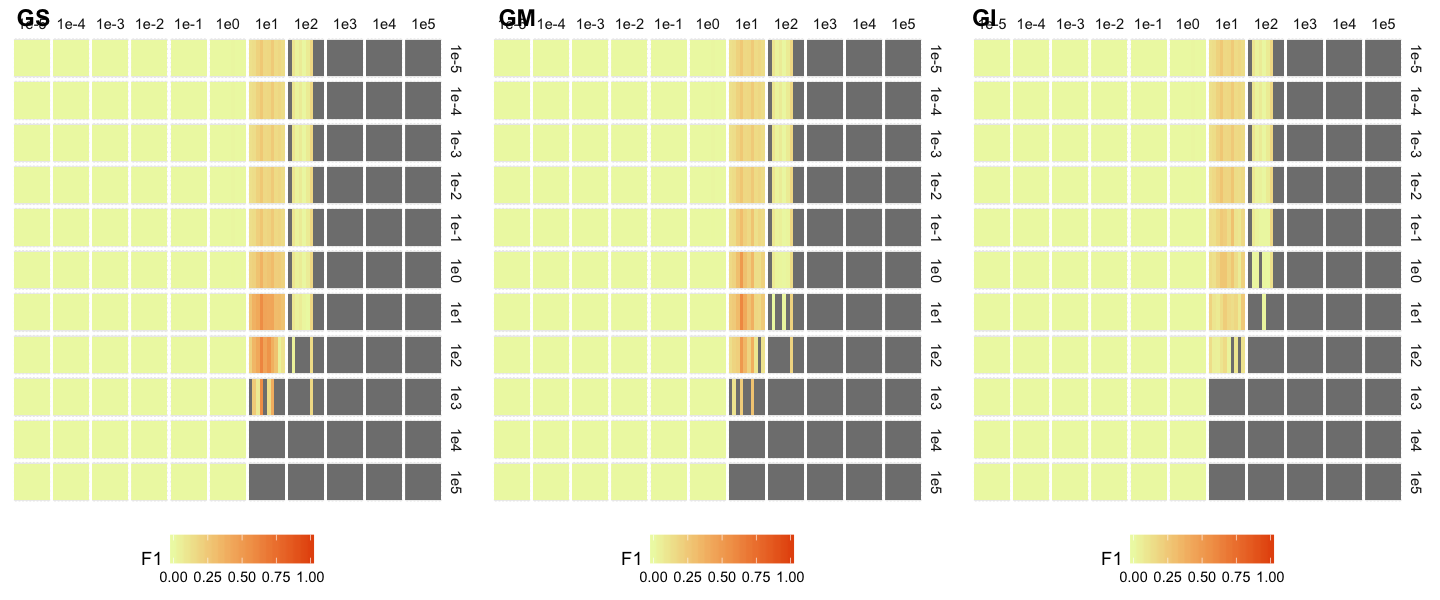

In [2]:
options(repr.plot.width=12, repr.plot.height=5)

plt <- lapply(c("GS","GM","GI"), function(n) {
    filter(bm, net == n & LD == "Without LD" & h2 == 1) %>%
    ggplot(aes(x = as.character(id), y = 1, fill = F1)) +
        geom_tile() +
        facet_grid(lambda ~ eta) +
        theme_minimal() +
        theme(legend.position="bottom",
              axis.title.x=element_blank(), axis.title.y=element_blank(),
              axis.text.x=element_blank(), axis.text.y=element_blank(),
              axis.ticks.x=element_blank(), axis.ticks.y=element_blank(),
              panel.spacing = unit(0.1, "lines")) +
        scale_fill_gradient(limits=c(0,1), low = "#edf8b1", high = "#e6550d")
})


plot_grid(plt[[1]], plt[[2]], plt[[3]], nrow = 1, ncol = 3, labels = c("GS", "GM", "GI"))

# filter out the uninteresting regions of hyperparameters
bm <- filter(bm, eta %in% c("1e0","1e1","1e2") & 
                 lambda %in% c("1e-1","1e0","1e1","1e2","1e3","1e4"))

# Precision

## h<sup>2</sup> = 1

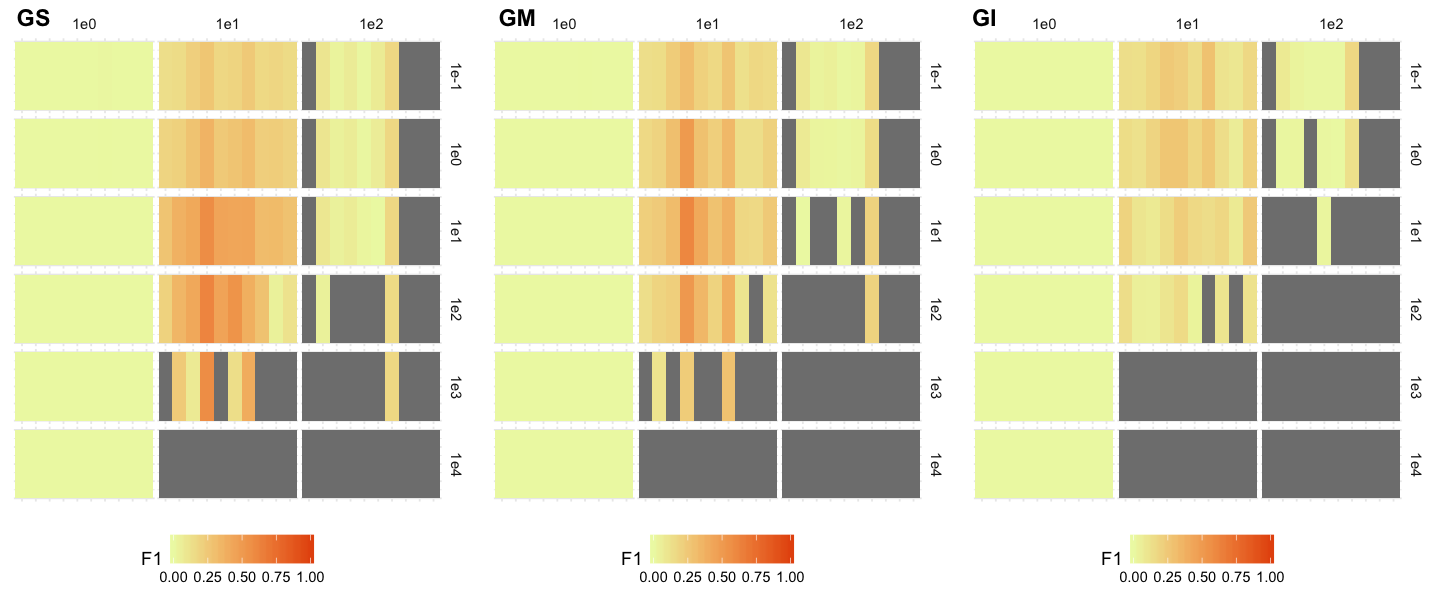

In [3]:
options(repr.plot.width=12, repr.plot.height=5)

plt <- lapply(c("GS","GM","GI"), function(n) {
    filter(bm, net == n & LD == "Without LD" & h2 == 1) %>%
    ggplot(aes(x = as.character(id), y = 1, fill = F1)) +
        geom_tile() +
        facet_grid(lambda ~ eta) +
        theme_minimal() +
        theme(legend.position="bottom",
              axis.title.x=element_blank(), axis.title.y=element_blank(),
              axis.text.x=element_blank(), axis.text.y=element_blank(),
              axis.ticks.x=element_blank(), axis.ticks.y=element_blank(),
              panel.spacing = unit(0.1, "lines")) +
        scale_fill_gradient(limits=c(0,1), low = "#edf8b1", high = "#e6550d")
})


plot_grid(plt[[1]], plt[[2]], plt[[3]], nrow = 1, ncol = 3, labels = c("GS", "GM", "GI"))

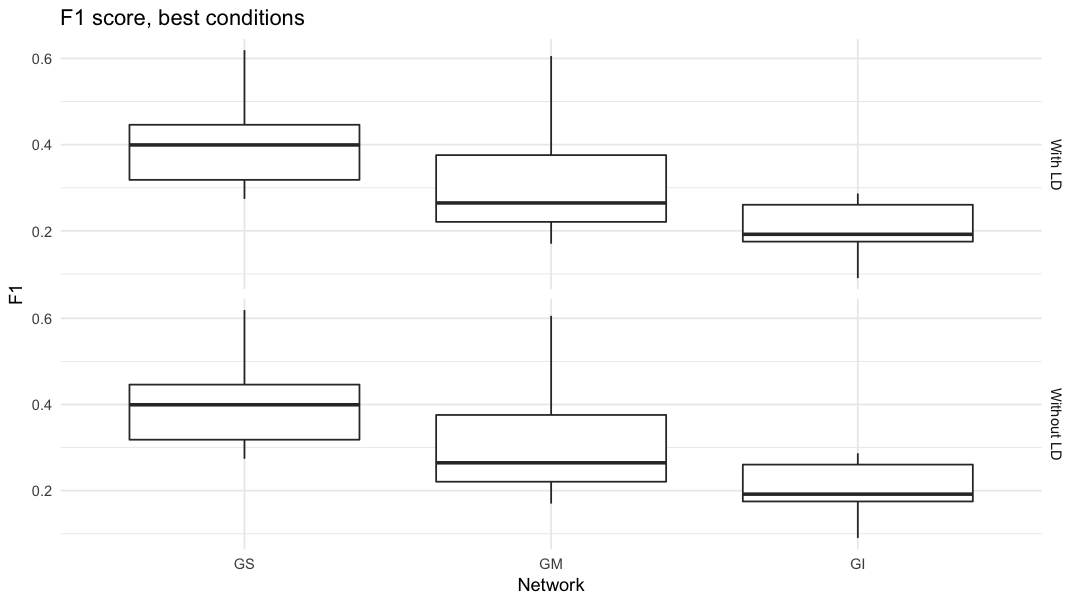

In [4]:
options(repr.plot.width=9, repr.plot.height=5)
bm %>%
    filter(h2 == 1) %>%
    group_by(LD, net, id) %>%
    summarize(F1 = F1[which.max(F1)]) %>%
    ggplot(aes(x = net, y = F1)) +
        geom_boxplot() +
        facet_grid(LD ~ .) +
        theme_minimal() +
        theme(legend.position="bottom") +
        labs(title = "F1 score, best conditions", x = "Network")

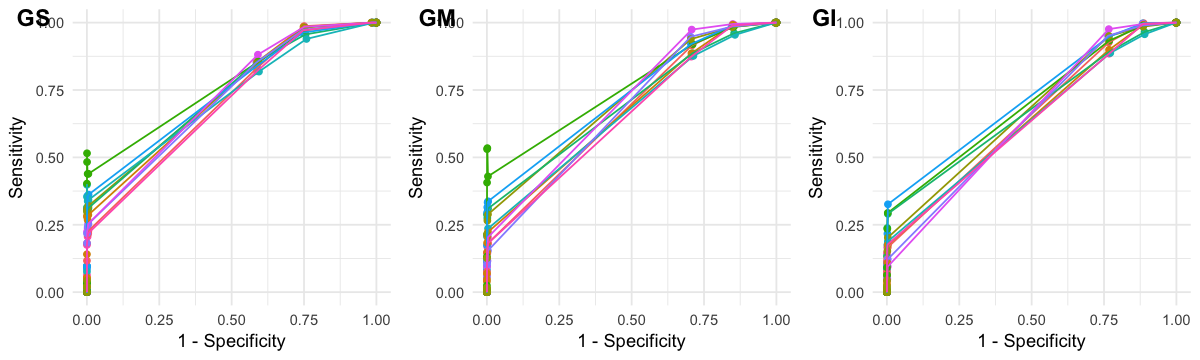

In [5]:
options(repr.plot.width=10, repr.plot.height=3)
plt <- lapply(c("GS","GM","GI"), function(n) {
    filter(bm, net == n & LD == "Without LD" & h2 == 1) %>%
    ggplot(aes(x = 1 - Specificity, y = Sensitivity, color = as.character(id))) +
        geom_point() +
        geom_line() +
        theme_minimal() +
        theme(legend.position = "none") +
        scale_fill_gradient(limits=c(0,1), low = "#edf8b1", high = "#e6550d")
})

plot_grid(plt[[1]], plt[[2]], plt[[3]], nrow = 1, ncol = 3, labels = c("GS", "GM", "GI"))

## h<sup>2</sup> = 0.25

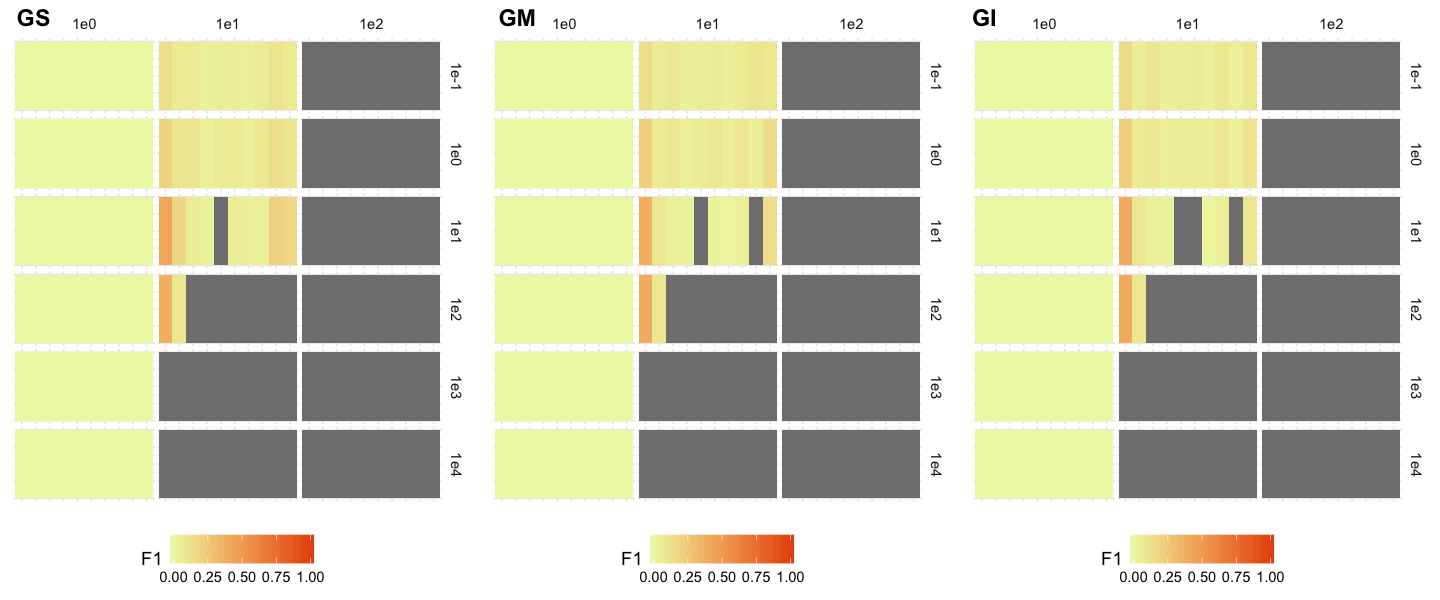

In [6]:
options(repr.plot.width=12, repr.plot.height=5)

plt <- lapply(c("GS","GM","GI"), function(n) {
    filter(bm, net == n & LD == "Without LD" & h2 == 0.25) %>%
    ggplot(aes(x = as.character(id), y = 1, fill = F1)) +
        geom_tile() +
        facet_grid(lambda ~ eta) +
        theme_minimal() +
        theme(legend.position="bottom",
              axis.title.x=element_blank(), axis.title.y=element_blank(),
              axis.text.x=element_blank(), axis.text.y=element_blank(),
              axis.ticks.x=element_blank(), axis.ticks.y=element_blank(),
              panel.spacing = unit(0.1, "lines")) +
        scale_fill_gradient(limits=c(0,1), low = "#edf8b1", high = "#e6550d")
})

plot_grid(plt[[1]], plt[[2]], plt[[3]], nrow = 1, ncol = 3, labels = c("GS", "GM", "GI"))

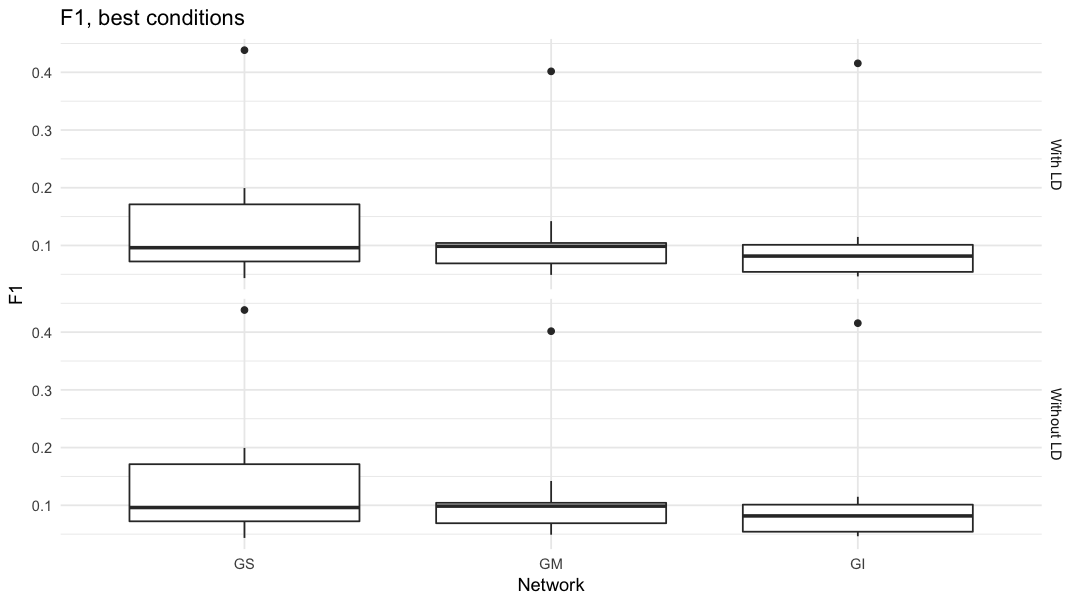

In [7]:
options(repr.plot.width=9, repr.plot.height=5)
bm %>%
    filter(h2 == 0.25) %>%
    group_by(LD, net, id) %>%
    summarize(F1 = F1[which.max(F1)]) %>%
    ggplot(aes(x = net, y = F1)) +
        geom_boxplot() +
        facet_grid(LD ~ .) +
        theme_minimal() +
        theme(legend.position="bottom") +
        labs(title = "F1, best conditions", x = "Network")

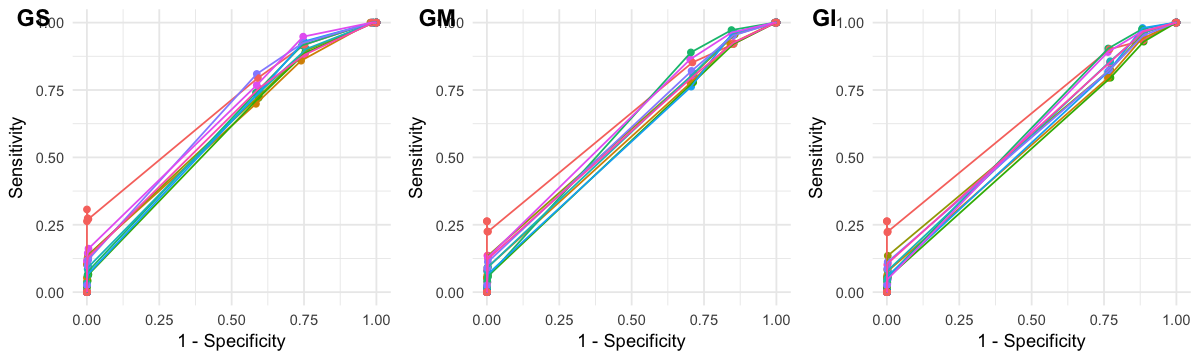

In [8]:
options(repr.plot.width=10, repr.plot.height=3)

plt <- lapply(c("GS","GM","GI"), function(n) {
    filter(bm, net == n & LD == "Without LD" & h2 == 0.25) %>%
    ggplot(aes(x = 1 - Specificity, y = Sensitivity, color = as.character(id))) +
        geom_point() +
        geom_line() +
        theme_minimal() +
        theme(legend.position = "none") +
        scale_fill_gradient(limits=c(0,1), low = "#edf8b1", high = "#e6550d")
})

plot_grid(plt[[1]], plt[[2]], plt[[3]], nrow = 1, ncol = 3, labels = c("GS", "GM", "GI"))

# Ratio detected to causal SNPs

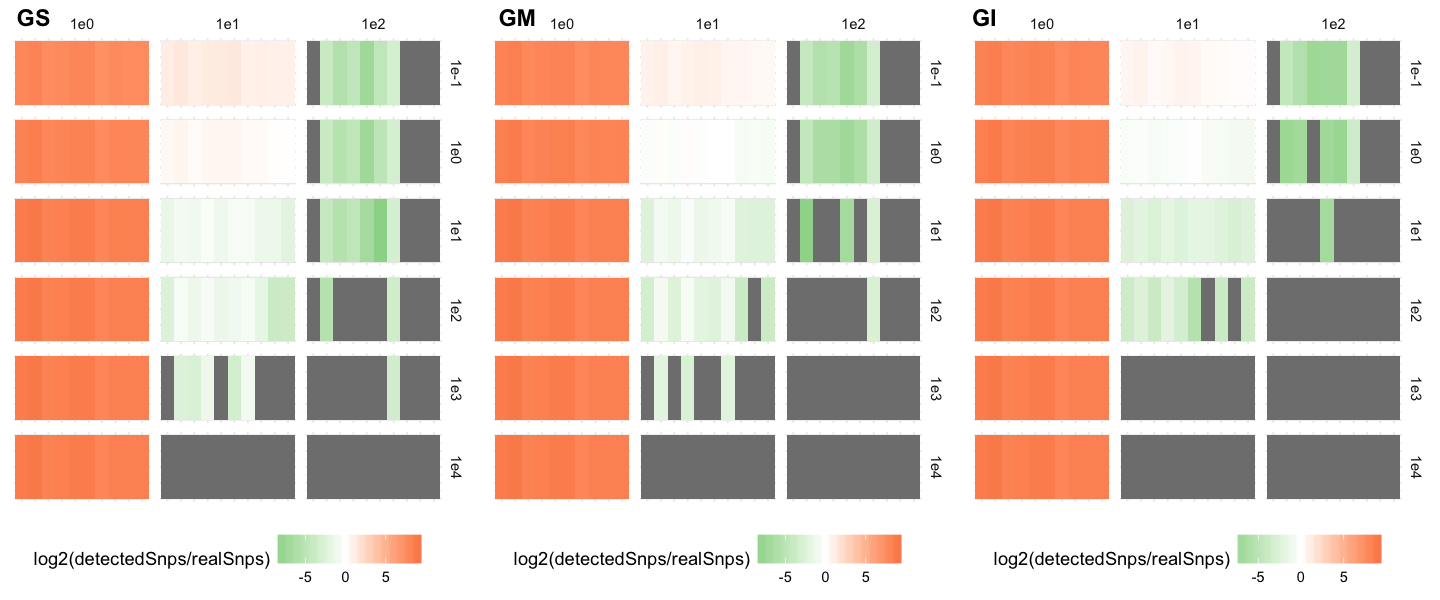

In [9]:
options(repr.plot.width=12, repr.plot.height=5)

plt <- lapply(c("GS","GM","GI"), function(n) {
    filter(bm, net == n  & LD == "Without LD" & h2 == 1) %>%
    ggplot(aes(x = as.character(id), y = 1, fill = log2(detectedSnps/realSnps)) ) +
        geom_tile() +
        facet_grid(lambda ~ eta) +
        theme_minimal() +
        theme(legend.position="bottom",
              axis.title.x=element_blank(), axis.title.y=element_blank(),
              axis.text.x=element_blank(), axis.text.y=element_blank(),
              axis.ticks.x=element_blank(), axis.ticks.y=element_blank()) +
        scale_fill_gradient2(low = "#99d594", high = "#fc8d59", mid = "white")
})

plot_grid(plt[[1]], plt[[2]], plt[[3]], nrow = 1, ncol = 3, 
          labels = c("GS", "GM", "GI"))

# Elapsed time

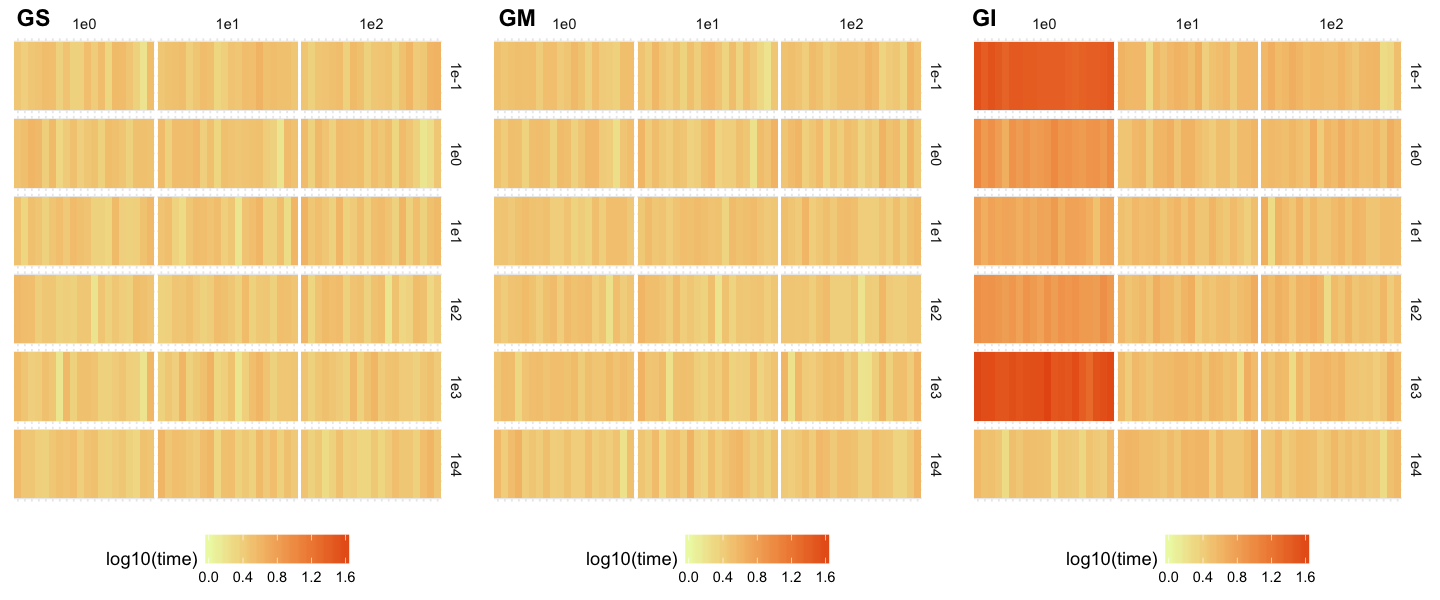

In [10]:
options(repr.plot.width=12, repr.plot.height=5)

plt <- lapply(c("GS","GM","GI"), function(n) {
    filter(bm, net == n & LD == "Without LD") %>%
    ggplot(aes(x = as.character(id), y = 1, fill = log10(time))) +
        geom_tile() +
        facet_grid(lambda ~ eta) +
        theme_minimal() +
        theme(legend.position="bottom",
              axis.title.x=element_blank(), axis.title.y=element_blank(),
              axis.text.x=element_blank(), axis.text.y=element_blank(),
              axis.ticks.x=element_blank(), axis.ticks.y=element_blank(),
              panel.spacing = unit(0.1, "lines")) +
        scale_fill_gradient(limits=c(0, 1.7),low = "#edf8b1", high = "#e6550d")
})

plot_grid(plt[[1]], plt[[2]], plt[[3]], nrow = 1, ncol = 3, labels = c("GS", "GM", "GI"))